In [1]:
%matplotlib inline
%config IPython.matplotlib.backend = "retina"
from matplotlib import rcParams
rcParams["savefig.dpi"] = 300
rcParams["figure.dpi"] = 300
rcParams['xtick.major.size'] = 1.5
rcParams['xtick.major.width'] = 1.5
rcParams['xtick.minor.size'] = 1.5
rcParams['xtick.minor.width'] = 1.5
rcParams['ytick.major.size'] = 1.5
rcParams['ytick.major.width'] = 1.5
rcParams['ytick.minor.size'] = 1.5
rcParams['ytick.minor.width'] = 1.5
rcParams['axes.linewidth'] = 1

import numpy as np
import lightkurve
from sklearn.decomposition import FastICA, PCA
import matplotlib.pyplot as plt

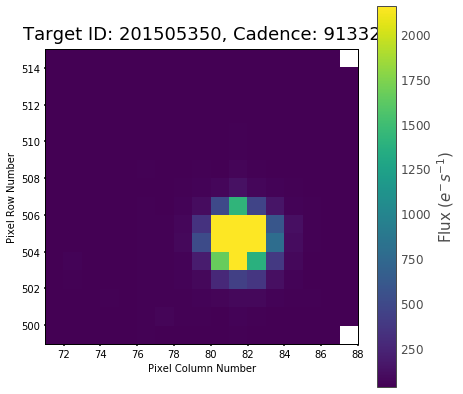

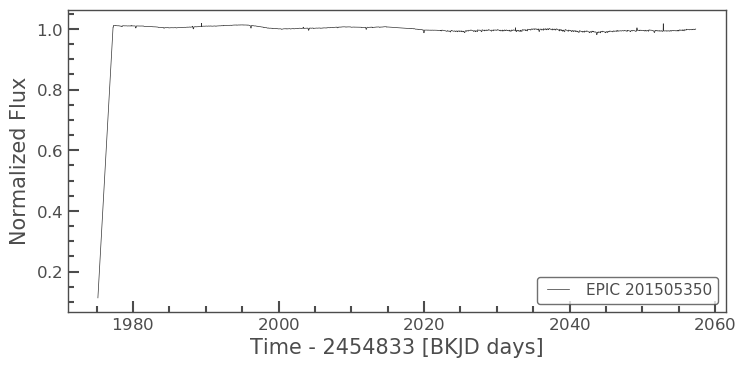

In [2]:
f = lightkurve.search.search_targetpixelfile('K2-19')
tpfs = f.download_all()

tpfs.plot()

ff = tpfs[0].to_lightcurve()
ff.plot()

(3555, 5) (272, 5) (3555, 16, 17)


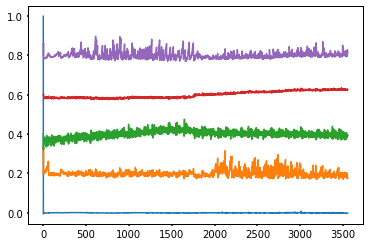

In [3]:
n_components = 5

X = np.ascontiguousarray(np.nan_to_num(tpfs[0].flux), np.float64)
X_flat = X.reshape(len(tpfs[0].flux),-1)

np.random.seed(56028468)
ica = FastICA(n_components=n_components)
S_ = ica.fit_transform(X_flat)
A_ = ica.mixing_

print(S_.shape, A_.shape, tpfs[0].flux.shape)

for i in range(n_components):
    plt.plot(S_[:,i]+0.2*i)

#fig = plt.gcf()
#fig.set_size_inches(14,10)

5


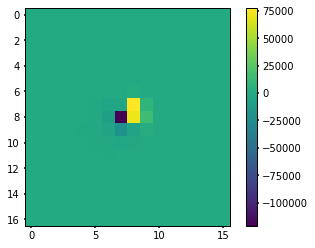

In [5]:
A_useful = A_.reshape(16,17,n_components).T
print(len(A_useful))
for i in range(n_components):
    plt.imshow(A_useful[i])
plt.colorbar()
    #plt.clf()

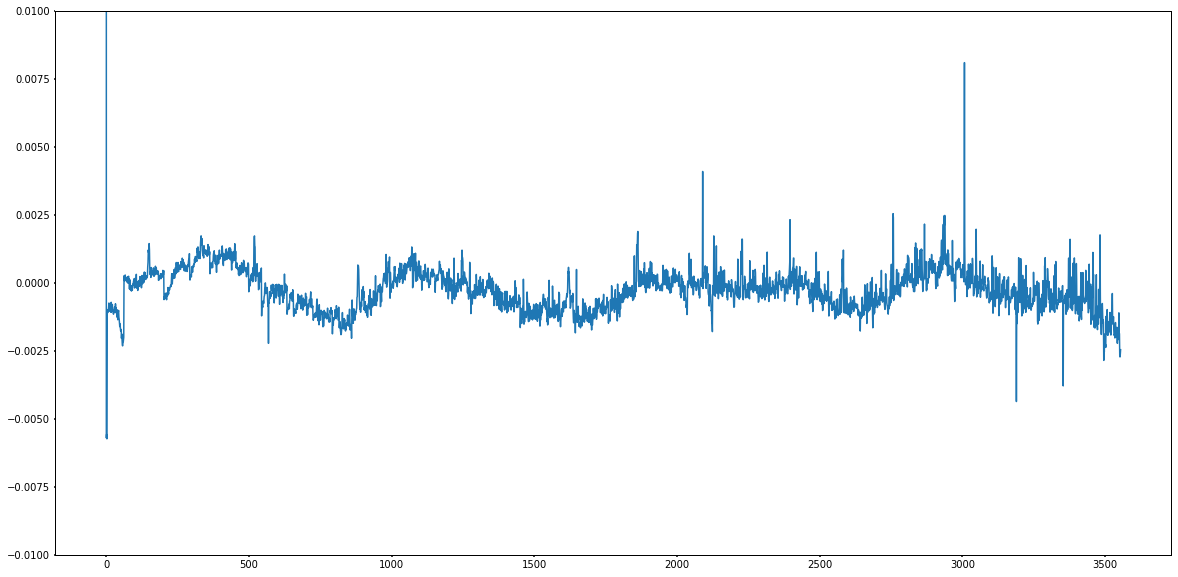

In [6]:
plt.plot(S_[:,0])
plt.ylim(-0.01,0.01)
fig = plt.gcf()
fig.set_size_inches(20,10)

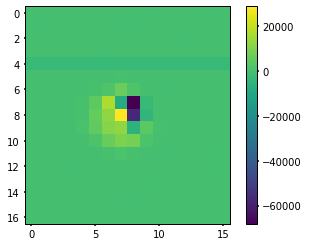

In [7]:
plt.imshow(A_useful[3])
plt.colorbar()

In [8]:
tpfs[0].flux.reshape(len(tpfs[0].flux),-1).reshape(len(tpfs[0].flux),16,17) 

array([[[ 3.82415771e+01,  3.88861465e+01,  4.02226257e+01, ...,
          3.98228340e+01,  3.64381561e+01,             nan],
        [ 4.02737999e+01,  3.94762573e+01,  4.02535934e+01, ...,
          3.93497162e+01,  3.60710983e+01,  3.44328041e+01],
        [ 3.82963905e+01,  4.17231064e+01,  3.79316902e+01, ...,
          4.41774292e+01,  3.45893745e+01,  3.48242416e+01],
        ...,
        [ 4.00689774e+01,  3.63691978e+01,  3.97915344e+01, ...,
          3.69776268e+01,  3.62187729e+01,  3.99468460e+01],
        [ 3.69566765e+01,  4.03654251e+01,  3.73899803e+01, ...,
          3.95319595e+01,  3.66202278e+01,  3.52775459e+01],
        [ 3.79877968e+01,  3.58642769e+01,  3.83194695e+01, ...,
          3.68232651e+01,  3.62242966e+01,             nan]],

       [[ 3.34745932e+00,  1.44601774e+00,  1.56220996e+00, ...,
          1.52940047e+00,  3.57570601e+00,             nan],
        [ 1.97087085e+00, -2.97723990e-03,  1.52999055e+00, ...,
          3.08660054e+00,  3.18003464e

In [9]:
tpfs[1].flux[:,-3:,-2:].shape
plt.plot(tpfs[1].flux[:,-3:,-2:].flatten())
#plt.xlim(16900,17100)



ERROR: IndexError: list index out of range [lightkurve.collections]


IndexError: list index out of range

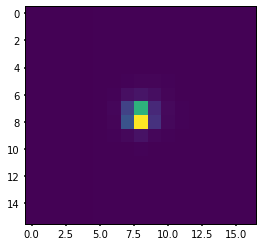

In [10]:
plt.imshow(np.median(X,axis=0))

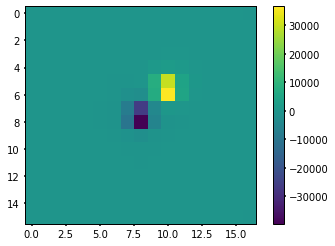

In [11]:
plt.imshow(np.dot(S_,A_.T).reshape(len(S_),16,17)[0])
plt.colorbar()

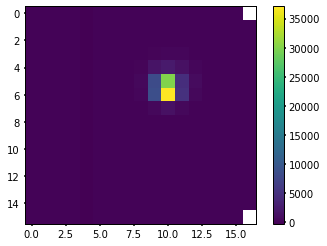

In [13]:
plt.imshow(tpfs[0].flux[0])
plt.colorbar()

In [14]:
tpfs[0].interact()

ERROR:bokeh.server.views.ws:Refusing websocket connection from Origin 'http://localhost:8889';                       use --allow-websocket-origin=localhost:8889 or set BOKEH_ALLOW_WS_ORIGIN=localhost:8889 to permit this; currently we allow origins {'localhost:8888'}
